#Exploratory Data Analysis

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import @gsplotfunccount as gp
import plotly.express as px
sns.set()

mpl.rcParams['axes.titlesize'] = 17    # font size for plot title
mpl.rcParams['axes.labelsize'] = 14    # font size for x-axis' and y-axis' label

In [3]:
# load data
stores = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/stores.pkl')
features = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/features.pkl')
sales = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/sales.pkl')
store_sales = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/store_sales.pkl')
weekly_sales = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/weekly_sales.pkl')

#Descriptive Statistics

In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Dept Weekly Sales (Thousand)
0,1,1,2010-02-05,24924.50,False,24.92450
1,1,1,2010-02-12,46039.49,True,46.03949
2,1,1,2010-02-19,41595.55,False,41.59555
3,1,1,2010-02-26,19403.54,False,19.40354
4,1,1,2010-03-05,21827.90,False,21.82790


In [5]:
# weekly sales by store's department
sales['Dept Weekly Sales (Thousand)'].describe().to_frame()

,Dept Weekly Sales (Thousand)
count,421570.000000
mean,15.981258
std,22.711184
min,-4.988940
25%,2.079650
50%,7.612030
75%,20.205853
max,693.099360


#stores

In [6]:
stores.head()

,Store,Type,Size,Num of Depts,Avg Yearly Sales (Million),Avg Yearly MarkDown (Thousand)
0,1,A,151315,77,74.134270,412.964688
1,2,A,202307,78,91.794147,541.514955
2,3,B,37392,72,19.195578,98.148110
3,4,A,205863,78,99.847984,543.798450
4,5,B,34875,72,15.158563,119.658845


In [7]:
# total sales by Walmart's store
stores['Avg Yearly Sales (Million)'].describe().to_frame()

,Avg Yearly Sales (Million)
count,45.000000
mean,49.905326
std,26.055852
min,12.386741
25%,26.521917
50%,46.083254
75%,66.537969
max,100.465931


In [8]:
store_sales.head()

,Store,Date,Store Weekly Sales (Thousand),Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Week,Month,Year,Quarter,MarkDown
0,1,2010-02-05,1643.69090,42.31,2.572,211.096358,8.106,False,5,2,2010,1,NaN
1,1,2010-02-12,1641.95744,38.51,2.548,211.242170,8.106,True,6,2,2010,1,NaN
2,1,2010-02-19,1611.96817,39.93,2.514,211.289143,8.106,False,7,2,2010,1,NaN
3,1,2010-02-26,1409.72759,46.63,2.561,211.319643,8.106,False,8,2,2010,1,NaN
4,1,2010-03-05,1554.80668,46.50,2.625,211.350143,8.106,False,9,3,2010,1,NaN


In [9]:
# yearly sales by store
yearly_sales = store_sales.groupby(['Store', 'Year'])['Store Weekly Sales (Thousand)'].sum().to_frame().reset_index()
yearly_sales['Store Yearly Sales (Million)'] = yearly_sales['Store Weekly Sales (Thousand)'] / 1000
yearly_sales.drop('Store Weekly Sales (Thousand)', axis=1, inplace=True)

# get statistics for yearly sales by store
temp_list = []
for year in [2010, 2011, 2012]:
    temp = yearly_sales[yearly_sales.Year == year]['Store Yearly Sales (Million)'].describe().to_frame()
    temp.rename(columns={'Store Yearly Sales (Million)': 'Store_Sales_' + str(year) + ' (Million)'}, inplace = True)
    temp_list.append(temp)
stats_df = pd.concat(temp_list, axis=1)
stats_df

,Store_Sales_2010 (Million),Store_Sales_2011 (Million),Store_Sales_2012 (Million)
count,45.000000,45.000000,45.000000
mean,50.864136,54.404445,44.447397
std,26.783837,28.592598,23.019093
min,12.766834,12.957837,11.435551
25%,25.568078,29.117303,24.827531
50%,48.370384,50.360182,41.739164
75%,66.890648,74.169226,59.212433
max,105.462242,111.092293,92.771189


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


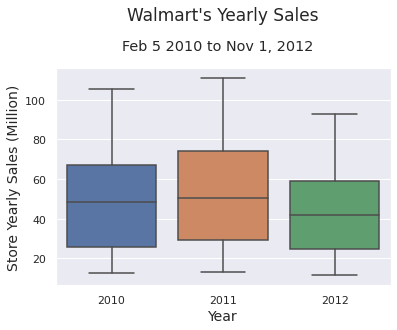

In [10]:
_ = sns.boxplot('Year', 'Store Yearly Sales (Million)', data=yearly_sales, orient='v')
plt.title("Walmart's Yearly Sales\n\n")
plt.suptitle('Feb 5 2010 to Nov 1, 2012')
plt.show()

In [11]:
# weekly sales by Walmart's store
store_sales['Store Weekly Sales (Thousand)'].describe().to_frame()

,Store Weekly Sales (Thousand)
count,6435.000000
mean,1046.964878
std,564.366622
min,209.986250
25%,553.350105
50%,960.746040
75%,1420.158660
max,3818.686450


#Univariate Data Analysis: 


In [12]:
#unique value Store Type
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

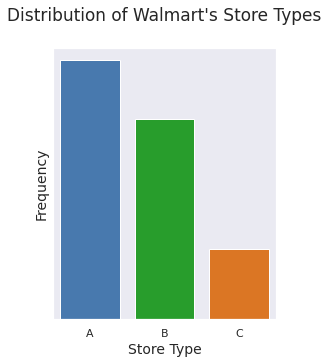

In [13]:
# plot distribution of Store Type

fig, ax = plt.subplots(figsize=(4, 5))

# color pallete for store type
colors = ["windows blue", "green", "orange"]
color_palette = sns.xkcd_palette(colors)

# draw bar plot
_ = sns.countplot(x='Type', data=stores, ax=ax, palette=color_palette)

plt.yticks([])
plt.xlabel('Store Type')
plt.ylabel('Frequency')
plt.title("Distribution of Walmart's Store Types\n")
plt.show()

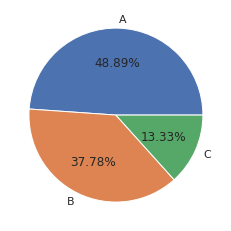

<Figure size 1440x1440 with 0 Axes>

In [14]:
#Showcasing  "Type of Store"   
a=stores['Type'].value_counts()
plt.pie(x=a, labels=a.index, autopct='%1.2f%%')

plt.figure(figsize = [20,20])

plt.show()

##Insight: There are more Type A (48.89%) stores, then Type B(37.78%) and then C(13.33%)


In [20]:
sizes= stores.groupby('Size').mean()
px.line(sizes, x = sizes.index, y = sizes['Avg Yearly Sales (Million)'],title='Store size and sales')

###Insights: Size is an important factor when it comes to sales, as you can see here.

In [21]:
px.box(stores, x='Type', y='Size', color='Type', 
       title='Store size and Store type')


###Insights: Within size we can see that there are 3 types of stores, the A are the most present.

In [22]:
store_sale_Type = pd.concat([stores['Type'], sales['Weekly_Sales']], axis=1)
px.box(store_sale_Type.dropna(), x='Type', y='Weekly_Sales', color='Type', 
       title='Store type and sales')

Insights: In relation to the type of store we can see that although the C are the smallest ones, they are those that have the highest median sales.

###Barchart Function
Making bar plot and show bars in increasing or decreasing order.
    
Parameters:
    - df_in: a data frame
    - tile: plot's title
    - suptitle: plot's suptitle
    - xlabel: label for x-axis
    - ylabel: label for y-axis
    - n: number of bars
    - rank: show the bar in descending (largest) or ascending (smallest) order
    - figsize: figure's size
    - annotate: annotate plot (True or False)
    - hide_yticks: hide or show y tick marks & labels (True or False)


In [23]:
def barplot_by_rank(df_in, title='', suptitle='', xlabel='', ylabel='',
                    n=10, rank='largest', figsize=(12, 8), annotate=True, hide_yticks=True):
    
    x_col = df_in.columns[0]
    y_col = df_in.columns[1]
    xlabel = x_col if xlabel == '' else xlabel
    ylabel = y_col if ylabel == '' else ylabel
    
    # prepare the data frame and order data in increasing or decreasing values
    if rank == 'largest':
        data = df_in.nlargest(n, y_col)
    else:
        data = df_in.nsmallest(n, y_col)
    
    # create the figure and draw bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    _ = sns.barplot(x_col, y_col, data=data, order=data[x_col], ax=ax)
    
    # hide borders and annotate plot
    #gp.hide_borders(ax, ['left', 'top', 'right'])
    #gp.annotate_plot(ax, n=sum(stores[y_col]), pct_precision=2, annotate=annotate)
    
    # hide tick marks and labels for y-axis
    if hide_yticks == True:
        plt.yticks([])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.suptitle(suptitle, size=14)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



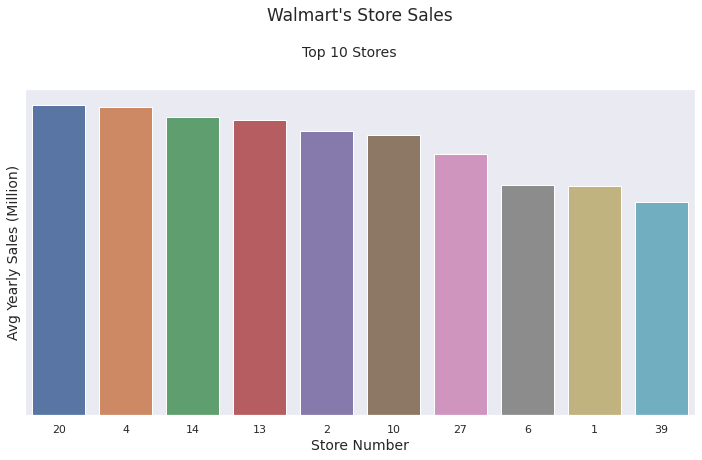

In [24]:
# bar plot of top 10 stores with highest avg sales
barplot_by_rank(stores[['Store', 'Avg Yearly Sales (Million)']], title="Walmart's Store Sales\n\n\n", 
                suptitle='Top 10 Stores', xlabel='Store Number')

## Bar plot of bottom 10 stores with lowest total sales

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



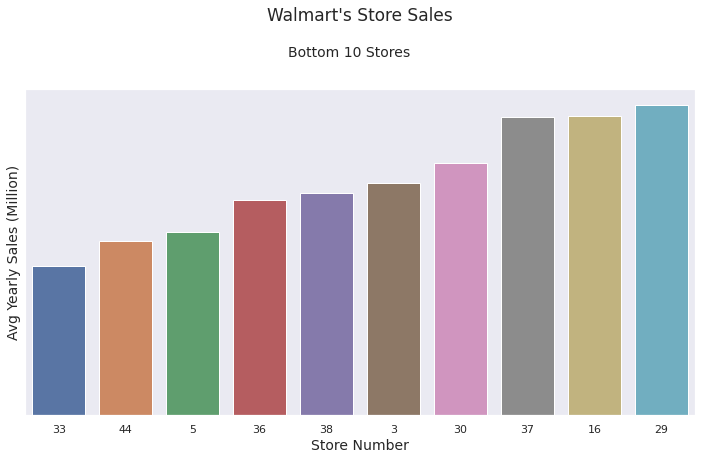

In [25]:
barplot_by_rank(stores[['Store', 'Avg Yearly Sales (Million)']], title="Walmart's Store Sales\n\n\n", 
                suptitle='Bottom 10 Stores', xlabel='Store Number', rank='smallest')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



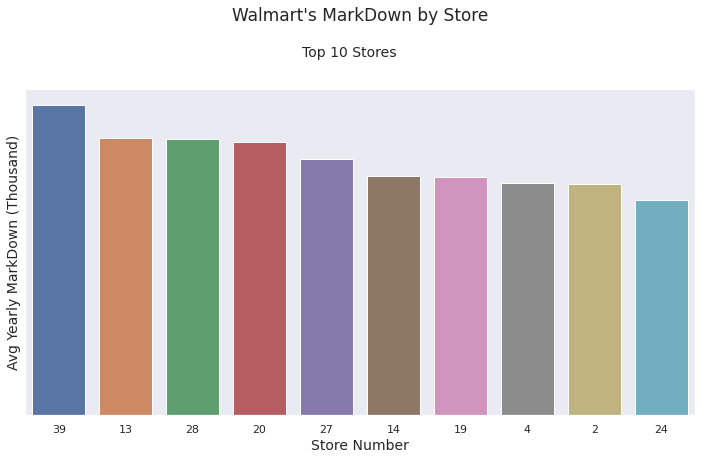

In [26]:
# bar plot of top 10 stores with highest total markdown
barplot_by_rank(stores[['Store', 'Avg Yearly MarkDown (Thousand)']], title="Walmart's MarkDown by Store\n\n\n", 
                suptitle='Top 10 Stores', xlabel='Store Number')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



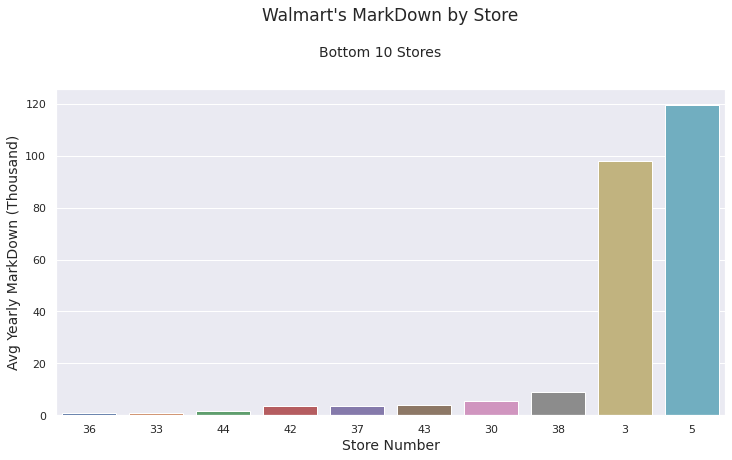

In [27]:
# bar plot of top 10 stores with highest total markdown
barplot_by_rank(stores[['Store', 'Avg Yearly MarkDown (Thousand)']], title="Walmart's MarkDown by Store\n\n\n", 
                suptitle='Bottom 10 Stores', xlabel='Store Number', rank='smallest', annotate=False,
                hide_yticks=False)

#Holidays
Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together:
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [29]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Dept Weekly Sales (Thousand)
0,1,1,2010-02-05,24924.50,False,24.92450
1,1,1,2010-02-12,46039.49,True,46.03949
2,1,1,2010-02-19,41595.55,False,41.59555
3,1,1,2010-02-26,19403.54,False,19.40354
4,1,1,2010-03-05,21827.90,False,21.82790


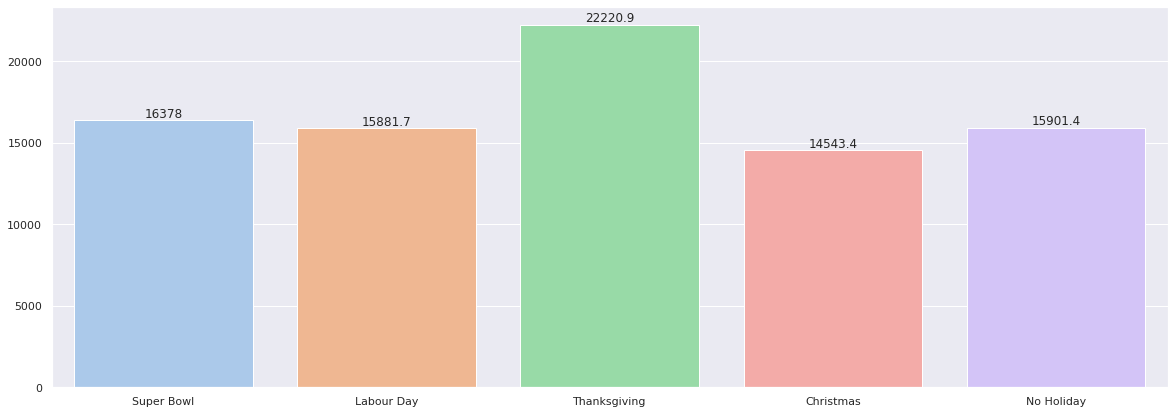

In [30]:
super_bowl = sales[sales['Date'].isin(['2010-02-12','2011-02-11','2012-02-10'])]
labour_day = sales[sales['Date'].isin(['2010-09-10','2011-09-09','2012-09-07'])]
thanksgiving = sales[sales['Date'].isin(['2010-11-26','2011-11-25','2012-11-23'])]
christmas = sales[sales['Date'].isin(['2010-12-31','2011-12-30','2012-12-28'])]
no_holiday = sales[sales['IsHoliday'] == 0]

y = [super_bowl['Weekly_Sales'].mean(),
    labour_day['Weekly_Sales'].mean(),
    thanksgiving['Weekly_Sales'].mean(),
    christmas['Weekly_Sales'].mean(),
    no_holiday['Weekly_Sales'].mean()]
x = ['Super Bowl',
    'Labour Day',
    'Thanksgiving',
    'Christmas',
    'No Holiday']

plt.figure(figsize = (20,7))
barplot = sns.barplot(x = x,
           y = y,
           ci = None,
            palette = 'pastel')

barplot.bar_label(barplot.containers[0])
plt.show()


#Correlation matrix

In [ ]:
sns.set(style="white")

corr = stores.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

#Sales by department

In [ ]:
dept_sales = sales.groupby(by=['Store', 'Dept'])['Dept Weekly Sales (Thousand)'].sum().to_frame().reset_index()
dept_sales['Dept Sales (Million)'] = dept_sales['Dept Weekly Sales (Thousand)'] / 1000
del dept_sales['Dept Weekly Sales (Thousand)']

# create a heat map to compare sales across each department in each store
fig, ax = plt.subplots(figsize=(18, 8))
_ = sns.heatmap(dept_sales.pivot(index='Store', columns='Dept', values='Dept Sales (Million)'), cmap="BuPu")

plt.xlabel('Department Number')
plt.ylabel('Store Number')
plt.title('Walmart\'s Store Sales by Department (Million USD)\n')
plt.show()

#Store_sales

In [ ]:
store_sales.head()

In [ ]:
px.histogram(store_sales, x='Temperature', y ='Store Weekly Sales (Thousand)', color='IsHoliday', marginal='box', opacity= 0.6,
             title = 'Temperature and sales by holiday')

###Insights: There is a pattern between the coldness and the sales, obviously related to the fact that the USA is in the northern hemisphere, and it is a country where a large part of it experiences cold temperatures for this time.

In [ ]:
px.histogram(store_sales, x='Fuel_Price', y ='Store Weekly Sales (Thousand)', color='IsHoliday', marginal='box', opacity= 0.4,
             title='Fuel price and sales by holiday')

###Insights: There is not a very clear pattern here, but you can see that the lower the fuel price, the more sales.

In [ ]:
px.histogram(store_sales, x='Unemployment', y ='Store Weekly Sales (Thousand)', color='IsHoliday', marginal='box', opacity= 0.6,
             title='Unemployment rate and sales by holiday',color_discrete_sequence=palette)

###Insights: In relation to unemployment, it can be seen that the lower the value, higher the sales, it makes sense.

In [ ]:
weekly_sales_2010 = store_sales[store_sales.Year==2010].groupby('Week')['Store Weekly Sales (Thousand)'].mean()
weekly_sales_2011 = store_sales[store_sales.Year==2011].groupby('Week')['Store Weekly Sales (Thousand)'].mean()
weekly_sales_2012 = store_sales[store_sales.Year==2012].groupby('Week')['Store Weekly Sales (Thousand)'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

In [ ]:
print("2010 Sales:" ,weekly_sales_2010.describe())
print("======================")
print("2011 Sales:" ,weekly_sales_2011.describe())
print("======================")
print("2012 Sales:" , weekly_sales_2012.describe())


#Average Sales per Store and Department

In [ ]:
store_sales.head()

In [ ]:
weekly_sales = store_sales["Store Weekly Sales (Thousand)"].groupby(store_sales['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Weekly Sales (Thousand)', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In [ ]:
#Weekly Sales by store
weekly_sales.describe()

##Insight: We see here that different stores have different sales

#Sales

In [ ]:
sales.head()

In [ ]:
weekly_sales_d = sales['Weekly_Sales'].groupby(sales['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales_d.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

In [ ]:
#sales by department statestics
weekly_sales_d.describe()

##Insight: And there are Sales difference between the Departments too. Also some Depts are not in the list, like number '15', for example.

#Variables Correlation
Let's see the correlation between variables, using Pearson Correlation.
Correlation Metrics:

0: no correlation at all

0-0.3: weak correlation

0.3-0.7: moderate correlaton

0.7-1: strong correlation

Positive Correlation indicates that when one variable increase, the other also does. Negative is the opposite.

In [ ]:
sns.set(style="white")

corr = store_sales.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


The heatmap above shows that there is not a strong correlation between the following
variables:
• Store weekly sales and temperature
• Store weekly sales and fuel price
• Store weekly sales and CPI
• Store weekly sales and unemployment
• Store weekly sales and weekly markdown

In [ ]:
weekly_sales_corr = store_sales.corr().iloc[1,:]
corr_df = pd.DataFrame(data = weekly_sales_corr, index = weekly_sales_corr.index ).sort_values (by ='Store Weekly Sales (Thousand)', ascending = False)
corr_df = corr_df.iloc[1:]
bar = px.bar(corr_df, x = corr_df.index, y = 'Store Weekly Sales (Thousand)', color=corr_df.index, labels={'index':'Featues'},
             title='Feature correlation with sales',color_discrete_sequence=palette)
bar.update_traces(showlegend=False)

###Insights: Correlation of features with weekly sales: 
Markdown, Date(Month, week, Quarter) and Isholiday, fueal prize have positive correlation with slaes.

Year, Temperature, CPI , Unemploymet and store has negative coorilation with weekly sales.


In [ ]:
store_sales.columns

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

holiday_sales = store_sales.groupby('IsHoliday')['Store Weekly Sales (Thousand)'].mean()
holiday_counts = store_sales.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.show()

###Insights:

Only 7 percent of the weeks in the data are the holiday weeks
Despite being the less peecentage of holiday weeks the sales in the holidays week are on the average higher than in the non-holiday weeks